# lab-feature-engineering

#### In this lab, you will use learningSet.csv file which you have already cloned in the previous activities.

In [2]:
# importing some useful libraries
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [3]:
# read the file 'learningSet.csv' into a pandas DataFrame and see its shape
data = pd.read_csv('learningSet.csv')
data.shape
# the dataframe has 95412 rows and 481 columns

(95412, 481)

In [4]:
# if we have columns that have all values as NaN, we drop them
data.dropna(how='all', axis=1)
# We can also put a limitation on how many non-null values need to be in a row in order to keep it
#(in this example, the data needs to have at least 10 non-null values):
# data.dropna(thresh=10)

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


### Instructions

#### Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

#### - Check for null values in the numerical columns

In [5]:
# Let's get the numerical columns
numerical = data.select_dtypes(include=[np.number])
numerical.head(1)

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0


In [6]:
# list of numerical features
list(numerical)

['ODATEDW',
 'TCODE',
 'DOB',
 'AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 

In [7]:
# getting the NaN values from numerical features in descending row
numerical.isna().sum().sort_values(ascending=False)

RDATE_5    95403
RAMNT_5    95403
RDATE_3    95170
RAMNT_3    95170
RDATE_4    95131
           ...  
HUPA7          0
HUPA6          0
HUPA5          0
HUPA4          0
LFC6           0
Length: 407, dtype: int64

In [8]:
# getting the nulls percentage from numerical columns in descending row
nulls_percent_numerical = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_numerical.columns = ['column_name', 'nulls_percentage']
nulls_percent_numerical.sort_values(by='nulls_percentage' ,ascending=False)
# or
# nulls_percent_numerical = pd.DataFrame(numerical.isna().sum()*100/len(numerical), columns=['percentage'])
# nulls_percent_numerical.sort_values('percentage', ascending = False).head(30)

,column_name,nulls_percentage
346,RDATE_5,0.999906
368,RAMNT_5,0.999906
344,RDATE_3,0.997464
366,RAMNT_3,0.997464
345,RDATE_4,0.997055
...,...,...
145,HUPA7,0.000000
144,HUPA6,0.000000
143,HUPA5,0.000000
142,HUPA4,0.000000


#### - Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA
#### Use appropriate EDA technique where ever necessary.

In [9]:
# null percentage in the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA
nulls_percent_numerical[nulls_percent_numerical['column_name'].isin(['GEOCODE2','WEALTH1', 'ADI', 'DMA', 'MSA'])]

,column_name,nulls_percentage
6,WEALTH1,0.468830
150,MSA,0.001383
151,ADI,0.001383
152,DMA,0.001383


#### column GEOCODE2

In [10]:
# as we can notice, the column 'GEOCODE2' is not numerical but we will check its NaN values
data['GEOCODE2'].isna().sum()

132

In [11]:
# NaN percentage in the column GEOCODE2
data['GEOCODE2'].isna().sum()/len(data['GEOCODE2'])

0.001383473776883411

In [12]:
# counting the number of every value in the column GEOCODE2
print(data['GEOCODE2'].value_counts(dropna = False))

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64


In [13]:
# Actually we have nulls but we also have some empty values (empty strings) 
# (our strategy is to replace NaN values with 'B' and empty values with the most common value -'A',
# so we will keep the previous proportion)
data['GEOCODE2'] = data['GEOCODE2'].fillna('B')
data['GEOCODE2'].value_counts(dropna = False)
# we have 187 empty values (gaps) and we should deal with them

A    34484
B    28637
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [14]:
# defining a function to replace empty values (empty strings) with the most common value -'A'
def replacing_empty_geocode2(x):
    if x in [' ']:
        return 'A'
    else:
        return x

In [15]:
# applying the function to the column GEOCODE2
# counting again the number of every value in the column 'GEOCODE2' after applying the function  
data['GEOCODE2'] = data['GEOCODE2'].apply(replacing_empty_geocode2)
data['GEOCODE2'].value_counts()

A    34671
B    28637
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [16]:
# defining a new dataframe with the numerical columns 'WEALTH1', 'ADI', 'DMA', 'MSA'
some_columns = pd.DataFrame(data, columns=['WEALTH1', 'ADI', 'DMA', 'MSA'])
some_columns

,WEALTH1,ADI,DMA,MSA
0,NaN,177.0,682.0,0.0
1,9.0,13.0,803.0,4480.0
2,1.0,281.0,518.0,0.0
3,4.0,67.0,862.0,9340.0
4,2.0,127.0,528.0,5000.0
...,...,...,...,...
95407,NaN,0.0,743.0,380.0
95408,9.0,201.0,618.0,3360.0
95409,NaN,61.0,551.0,4040.0
95410,NaN,13.0,803.0,8735.0


different unique values: 10
null values: 44732


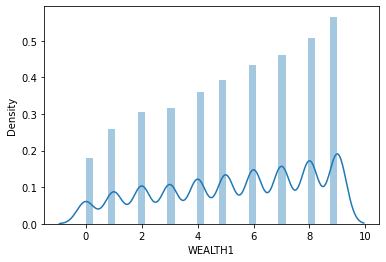

different unique values: 204
null values: 132


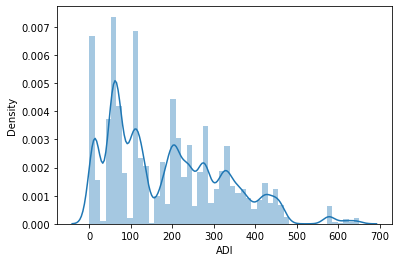

different unique values: 206
null values: 132


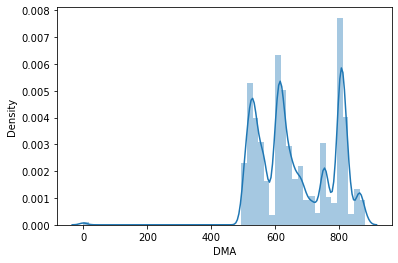

different unique values: 298
null values: 132


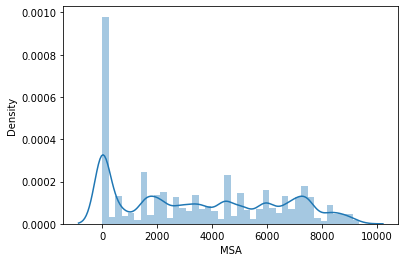

In [17]:
# printing unique values and plotting the distribution plots of the columns 'WEALTH1', 'ADI', 'DMA', 'MSA'
for col in some_columns.columns[some_columns.isna().any()]:
    print('different unique values: ' + str(len(some_columns[col].value_counts())))
    print('null values: ' + str(some_columns[col].isnull().sum()))
    sns.distplot(some_columns[some_columns[col].isna()==False][col])
    plt.show()
# not normal distributions and a lot of null values in column 'WEALTH1'

#### Let's check these specific numerical columns one by one

#### column WEALTH1

In [18]:
# counting the number of every value in the column WEALTH1
numerical['WEALTH1'].value_counts(dropna = False)
# we notice that we have a lot of NaN values 44732, which is the 46.9% of the whole values

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [19]:
# we will get the correlation between the columns WEALTH1 and the target columns TARGET_D and TARGET_B
# to understand if the column WEALTH1 is important
# and if we should spend a lot of time for the data cleaning of the column WEALTH1
data['WEALTH1'].corr(data['TARGET_D']), data['WEALTH1'].corr(data['TARGET_B'])
# low correlations, no need to spend much time

(0.02486731173097657, 0.011248763279752603)

<AxesSubplot:>

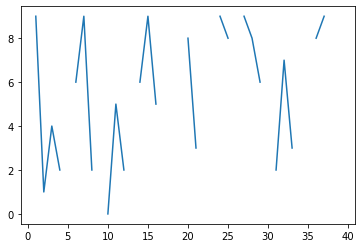

In [20]:
# Let's see a plot of the first 40 values and understand better how to deal with the NaN values. 
numerical['WEALTH1'][0:40].plot()
# interpolation could be a good idea

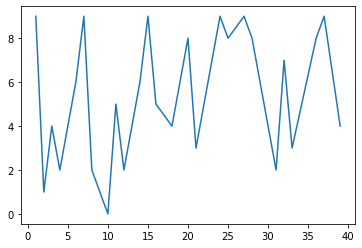

In [21]:
# We will try different ways of interpolation
# First, linear interpolation
new_wealth1_data_linear = data['WEALTH1'][0:40].interpolate(method='linear')
# linear interpolation assumes that the rate of change between the values is constant
new_wealth1_data_linear.plot()
plt.show()

In [22]:
new_wealth1_data_linear[0:40].value_counts()
# after checking we can see some float numbers in the observations of interpolation (for example 1 observation 6.333333  and 1 observation 4.666667),
# we do not prefer to exist float interpolated observations

9.000000    6
4.000000    6
2.000000    4
6.000000    4
8.000000    4
5.000000    3
1.000000    2
3.000000    2
7.000000    2
0.000000    1
4.500000    1
8.500000    1
4.666667    1
6.333333    1
6.500000    1
Name: WEALTH1, dtype: int64

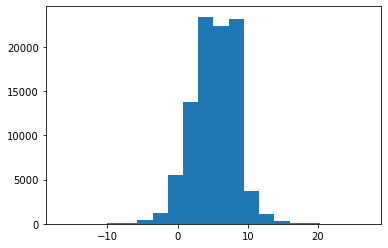

In [23]:
# polynomial method and check which one are more normally distributed
plt.hist(numerical['WEALTH1'].interpolate(method='polynomial', order=2), bins=20) 
plt.show()

<AxesSubplot:>

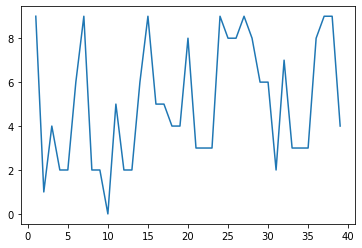

In [24]:
# interpolation with the pad method where the proportion of the NaN values will be filled with the same proportion of values
new_wealth1_data_pad = data['WEALTH1'][0:40].interpolate(method='pad')
new_wealth1_data_pad.plot()

In [25]:
new_wealth1_data_pad[0:40].value_counts()
# we have only integer values-observations, so we will use this technique for the filling the NaN values

9.0    7
2.0    7
3.0    6
8.0    5
4.0    4
6.0    4
5.0    3
1.0    1
0.0    1
7.0    1
Name: WEALTH1, dtype: int64

<AxesSubplot:>

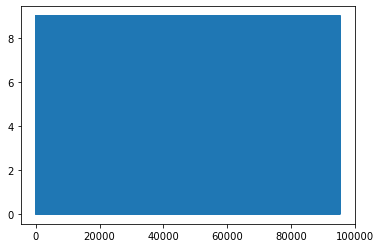

In [26]:
new_wealth1_data_pad_whole = data['WEALTH1'].interpolate(method='pad')
new_wealth1_data_pad_whole.plot()
# the data are huge, this is the reason we get this plot

In [27]:
# counting the values of the column after interpolation
new_wealth1_data_pad_whole.value_counts()
# we have only integers as observations and no NaN values

9.0    14335
8.0    12796
7.0    11548
6.0    11043
5.0     9898
4.0     9105
3.0     8026
2.0     7578
1.0     6493
0.0     4589
Name: WEALTH1, dtype: int64

In [28]:
# replacing column WEALTH1 with the interpolated data
numerical['WEALTH1']=new_wealth1_data_pad_whole
numerical['WEALTH1'].value_counts()

9.0    14335
8.0    12796
7.0    11548
6.0    11043
5.0     9898
4.0     9105
3.0     8026
2.0     7578
1.0     6493
0.0     4589
Name: WEALTH1, dtype: int64

In [29]:
# getting the column 'WEALTH1'
numerical['WEALTH1']

0        NaN
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    6.0
95408    9.0
95409    9.0
95410    9.0
95411    8.0
Name: WEALTH1, Length: 95412, dtype: float64

#### column ADI

In [30]:
# counting the number of every value in the column WEALTH1
numerical['ADI'].value_counts(dropna = False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [31]:
# only 132 NaN values
numerical['ADI'].isna().sum()

132

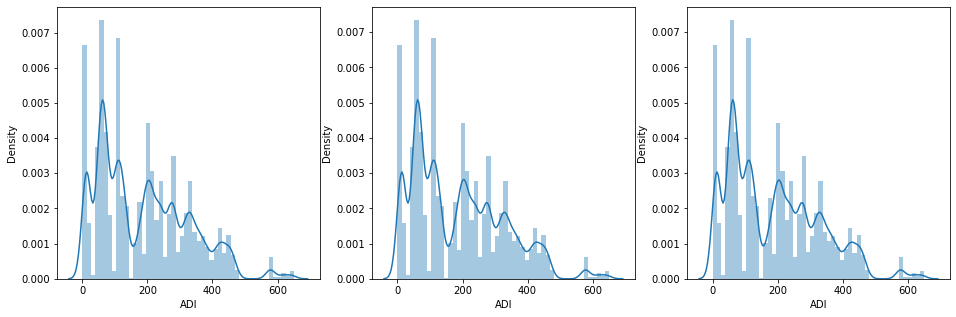

In [32]:
# we create 3 distribution plots
# 1. Original distribution, including NaN values
# 2. Distribution where NaN values replaced by Mean
# 3. Distribution where NaN values replaced by Median
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.distplot(numerical['ADI'], ax = ax[0])
sns.distplot(numerical['ADI'].fillna(np.mean(numerical[numerical['ADI'].notna()]['ADI'])), ax = ax[1])
sns.distplot(numerical['ADI'].fillna(np.median(numerical[numerical['ADI'].notna()]['ADI'])),ax = ax[2])
plt.show()
# we cannot see a significant difference, as the number of the nulls is really low

In [33]:
# we decided to replace the NaN values with the median 
numerical['ADI'] = numerical['ADI'].fillna(numerical['ADI'].median())
numerical['ADI'].isna().sum()

0

#### column DMA

In [34]:
# counting the number of every value in the column WEALTH1
numerical['DMA'].value_counts(dropna = False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [35]:
# only 132 NaN values
numerical['DMA'].isna().sum()

132

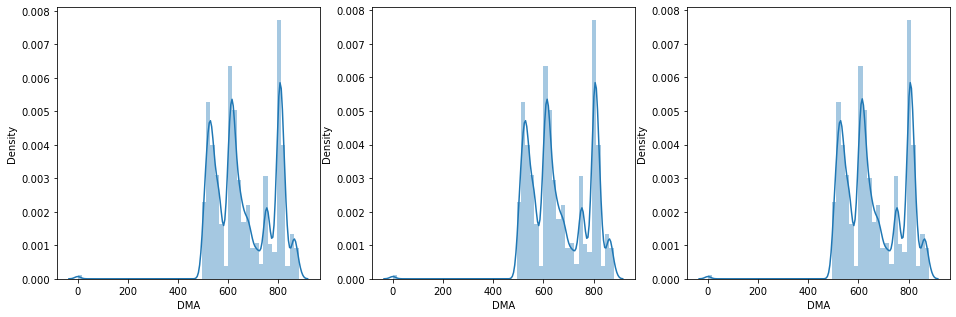

In [36]:
# we create 3 distribution plots
# 1. Original distribution, including NaN values
# 2. Distribution where NaN values replaced by Mean
# 3. Distribution where NaN values replaced by Median
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.distplot(numerical['DMA'], ax = ax[0])
sns.distplot(numerical['DMA'].fillna(np.mean(numerical[numerical['DMA'].notna()]['DMA'])), ax = ax[1])
sns.distplot(numerical['DMA'].fillna(np.median(numerical[numerical['DMA'].notna()]['DMA'])),ax = ax[2])
plt.show()
# we cannot see a significant difference, as the number of the nulls is really low

In [37]:
# we decided to replace the NaN values with the mean 
numerical['DMA'] = numerical['DMA'].fillna(numerical['DMA'].mean())
numerical['DMA'].isna().sum()

0

#### column MSA

In [38]:
# counting the number of every value in the column WEALTH1
numerical['MSA'].value_counts(dropna = False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [39]:
# only 132 NaN values
numerical['MSA'].isna().sum()

132

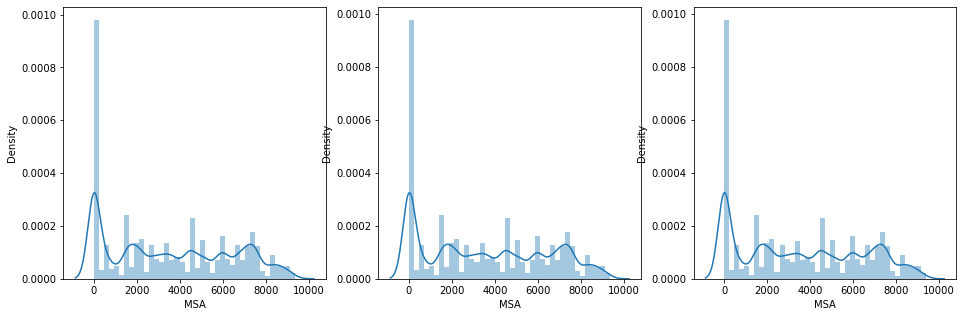

In [40]:
# we create 3 distribution plots
# 1. Original distribution, including NaN values
# 2. Distribution where NaN values replaced by Mean
# 3. Distribution where NaN values replaced by Median
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.distplot(numerical['MSA'], ax = ax[0])
sns.distplot(numerical['MSA'].fillna(np.mean(numerical[numerical['MSA'].notna()]['MSA'])), ax = ax[1])
sns.distplot(numerical['MSA'].fillna(np.median(numerical[numerical['MSA'].notna()]['MSA'])),ax = ax[2])
plt.show()
# we cannot see a significant difference, as the number of the nulls is really low

In [41]:
# we decided to replace the NaN values with the median 
numerical['MSA'] = numerical['MSA'].fillna(numerical['MSA'].median())
numerical['MSA'].isna().sum()

0